#1

In [8]:
import pandas as pd
import re

# Load the CSV file
file_path = '//content/train.csv'
data = pd.read_csv(file_path)

# Function to extract numeric values from strings
def extract_numeric(series):
    return series.str.extract(r'(\d+\.?\d*)').astype(float)

# Apply the function to relevant columns to extract numeric values
data['Mileage'] = extract_numeric(data['Mileage'])
data['Engine'] = extract_numeric(data['Engine'])
data['Power'] = extract_numeric(data['Power'])

# Impute missing values
# For 'Mileage', 'Engine', and 'Power', use median due to potential outliers
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)
data['Engine'].fillna(data['Engine'].median(), inplace=True)
data['Power'].fillna(data['Power'].median(), inplace=True)

# For 'Seats', use mode as it is likely a categorical value
data['Seats'].fillna(data['Seats'].mode()[0], inplace=True)

# Drop 'New_Price' column due to high proportion of missing values
data.drop(columns=['New_Price'], inplace=True)

# Verify if missing values have been handled
missing_values_after_cleaning = data.isnull().sum()
print(missing_values_after_cleaning)


Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


<ipython-input-8-f1f5b01cee6e>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Mileage'].fillna(data['Mileage'].median(), inplace=True)
<ipython-input-8-f1f5b01cee6e>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

#2


In [9]:
import pandas as pd
import re

# Load the CSV file
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Columns to clean
columns_to_clean = ['Mileage', 'Engine', 'Power', 'New_Price']

# Apply the extraction function to remove units and keep only numeric values
for column in columns_to_clean:
    data[column] = data[column].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Check the cleaned data
print(data[columns_to_clean].head())

   Mileage  Engine   Power  New_Price
0    19.67  1582.0  126.20        NaN
1    13.00  1199.0   88.70       8.61
2    20.77  1248.0   88.76        NaN
3    15.20  1968.0  140.80        NaN
4    23.08  1461.0   63.10        NaN


#3


In [10]:
# Perform one-hot encoding on 'Fuel_Type' and 'Transmission'
data = pd.get_dummies(data, columns=['Fuel_Type', 'Transmission'], drop_first=True)

# Check the data to confirm encoding
print(data.head())

   Unnamed: 0                              Name    Location  Year  \
0           1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
1           2                      Honda Jazz V     Chennai  2011   
2           3                 Maruti Ertiga VDI     Chennai  2012   
3           4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
4           6            Nissan Micra Diesel XV      Jaipur  2013   

   Kilometers_Driven Owner_Type  Mileage  Engine   Power  Seats  New_Price  \
0              41000      First    19.67  1582.0  126.20    5.0        NaN   
1              46000      First    13.00  1199.0   88.70    5.0       8.61   
2              87000      First    20.77  1248.0   88.76    7.0        NaN   
3              40670     Second    15.20  1968.0  140.80    5.0        NaN   
4              86999      First    23.08  1461.0   63.10    5.0        NaN   

   Price  Fuel_Type_Electric  Fuel_Type_Petrol  Transmission_Manual  
0  12.50               False             False

#4


In [11]:
from datetime import datetime

# Calculate the current year
current_year = datetime.now().year

# Create a new feature 'Car_Age' by subtracting 'Year' from the current year
data['Car_Age'] = current_year - data['Year']

# Display the first few rows to check the new column
print(data[['Year', 'Car_Age']].head())


   Year  Car_Age
0  2015        9
1  2011       13
2  2012       12
3  2013       11
4  2013       11


#5


In [12]:
# Select specific columns
selected_columns = data[['Car_Age', 'Mileage', 'Power', 'New_Price']]
print("Selected Columns:")
print(selected_columns.head())

# Filter the data for cars with Mileage greater than a certain value (e.g., 20,000)
filtered_data = data[data['Mileage'] > 20000]
print("Filtered Data (Mileage > 20000):")
print(filtered_data.head())

# Rename the 'New_Price' column to 'Price_New'
data.rename(columns={'New_Price': 'Price_New'}, inplace=True)
print("Renamed Columns:")
print(data[['Price_New']].head())

# Mutate: Create a new column for Price per Year
data['Price_Per_Year'] = data['Price_New'] / (data['Car_Age'] + 1)
print("Data with Price_Per_Year:")
print(data[['Price_New', 'Car_Age', 'Price_Per_Year']].head())

# Arrange data by 'Price_New' in descending order
arranged_data = data.sort_values(by='Price_New', ascending=False)
print("Arranged Data by Price_New (Descending):")
print(arranged_data[['Price_New']].head())

# Summarize and group by the appropriate 'Fuel_Type' columns
fuel_type_columns = [col for col in data.columns if col.startswith('Fuel_Type')]
print("Fuel Type Columns:", fuel_type_columns)

summary = data.groupby(fuel_type_columns).agg({'Price_New': 'mean'}).reset_index()
summary.columns = fuel_type_columns + ['Average_Price_New']
print("Summary of Average Price_New by Fuel_Type:")
print(summary)

Selected Columns:
   Car_Age  Mileage   Power  New_Price
0        9    19.67  126.20        NaN
1       13    13.00   88.70       8.61
2       12    20.77   88.76        NaN
3       11    15.20  140.80        NaN
4       11    23.08   63.10        NaN
Filtered Data (Mileage > 20000):
Empty DataFrame
Columns: [Unnamed: 0, Name, Location, Year, Kilometers_Driven, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price, Fuel_Type_Electric, Fuel_Type_Petrol, Transmission_Manual, Car_Age]
Index: []
Renamed Columns:
   Price_New
0        NaN
1       8.61
2        NaN
3        NaN
4        NaN
Data with Price_Per_Year:
   Price_New  Car_Age  Price_Per_Year
0        NaN        9             NaN
1       8.61       13           0.615
2        NaN       12             NaN
3        NaN       11             NaN
4        NaN       11             NaN
Arranged Data by Price_New (Descending):
      Price_New
4864      99.92
403       95.38
3166      95.13
253       95.13
1637      95.13
Fuel Type C

#visualization code


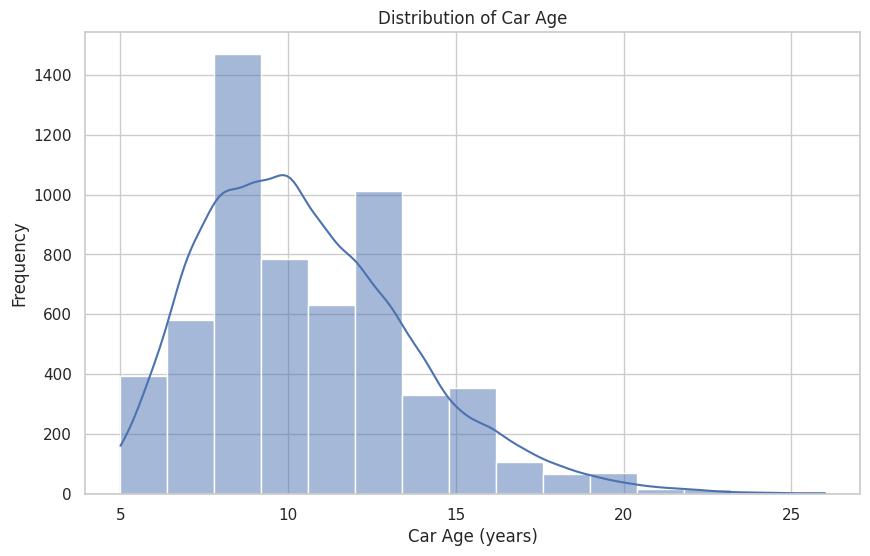

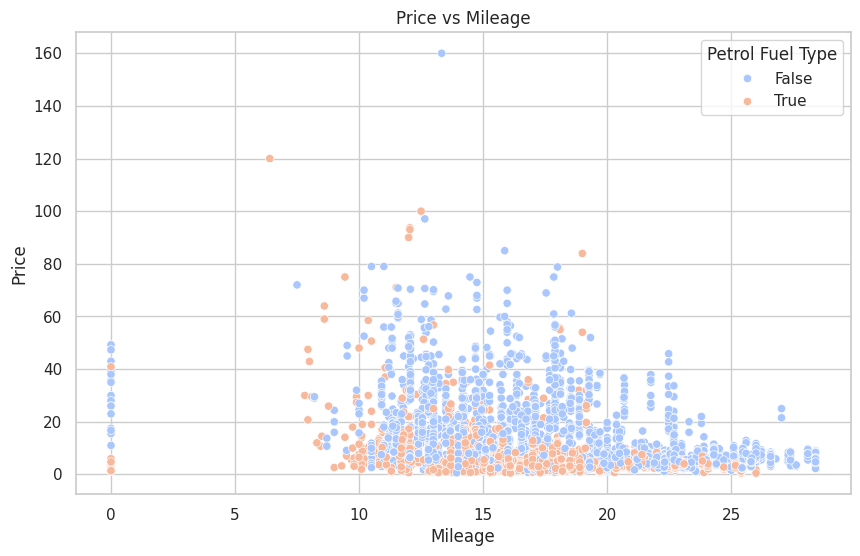

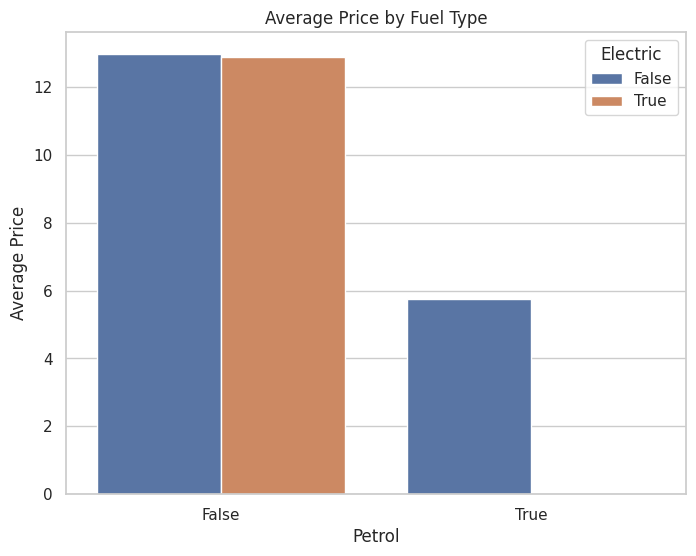

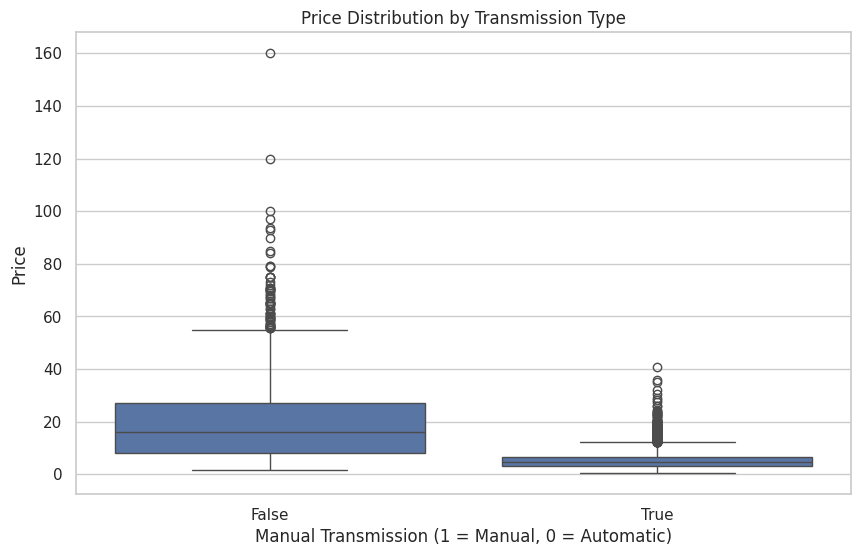

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# 1. Distribution of Car Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Car_Age'], bins=15, kde=True)
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (years)')
plt.ylabel('Frequency')
plt.show()

# 2. Price vs Mileage Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', data=data, hue='Fuel_Type_Petrol', palette='coolwarm')
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Petrol Fuel Type')
plt.show()

# 3. Average Price by Fuel Type
fuel_price_summary = data.groupby(['Fuel_Type_Petrol', 'Fuel_Type_Electric'])['Price'].mean().reset_index()
fuel_price_summary.columns = ['Petrol', 'Electric', 'Average Price']

plt.figure(figsize=(8, 6))
sns.barplot(x='Petrol', y='Average Price', hue='Electric', data=fuel_price_summary)
plt.title('Average Price by Fuel Type')
plt.ylabel('Average Price')
plt.show()

# 4. Box Plot of Price by Transmission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission_Manual', y='Price', data=data)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Manual Transmission (1 = Manual, 0 = Automatic)')
plt.ylabel('Price')
plt.show()
